# Exploratory Data Analysis of the Welltory COVID-19 and Wearables Open Data Research

Data was used from Welltory COVID-19 and Wearables Open Data Research, https://github.com/Welltory/hrv-covid19.
This report was done by Kelly Chen and Tejas Jyothi, 9/23/2024.
The cells should be run in order

## Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
import numpy as np

## Data Context

The data was collected based on positive COVID-19 cases. Heart rate was measured, and other general health related metrics. The goal of this dataset was to promote open research and study patterns to predict symptoms. It is centered around heart rate variability.
<br/> The data was sampled from those who tested positive for COVID-19. Here is the data breakdown below, to better understand our data exploration.
<br/>
<br/> participants.csv is where data was collected about each individual, most notably when they got COVID and other general characteristics about them
<br/> hrv_measurements.csv contains heart rate variability metrics. This table is extremely verbose in metrics, all around heart rate variability obtained from their app
<br/> blood_pressure.csv has a couple related metrics, as well as some indexes. This table is more basic but still containes valuable health information.
<br/> heart_rate.csv simply contains a heart rate metric with date and whether the heart rate was a resting heart rate
<br/> wearables.csv is wear all their gadget data was obtained. There are many metrics here like related to body condition as well as activity.
<br/> sleep.csv contains daily sleep data including rem metrics, heart rate, and duration metrics
<br/> weather.csv includes weather conditions for each subjects associated location, relevant to influence their health metrics
<br/> surveys.csv survey data related to covid symptoms and their intensity
<br/> scales_description.csv is for understanding the survey value meanings

## Data prepossessing

To combat outliers, we took the approach of capping and flooring values. This was based on quantile calculations. For further insight on which data files needed the outlier adjustments, see the box plots with notes on outliers. Duplicates were checked for but not found. Missing values were often handled with deletion or inserting averaged values. This is dependent on the type of data and amount of data available. For larger datasets, we were more liberal with deletion, but for smaller datasets like sleep which had lots of missing values, we opted for replacing nans with averages. This could skew the data, but we thought it is important to retain the data in some way rather than delete majority of its rows.

In [2]:
#read csv files
def read_file(name):
    df=pd.read_csv(name)
    return df

In [3]:
#drop rows that have missing values
def drop_nan(name):
    original_shape=name.shape
    name=name.dropna()
    after_shape = name.shape
    return original_shape, after_shape, name

In [4]:
# Remove duplicate rows and keep the first occurrence
def duplicates(name):
    duplicates = name[name.duplicated()]
    name = name.drop_duplicates(keep='first')
    return duplicates, name

In [5]:
#vused IQR method to handle outlier
def outlier(name):

    numeric_cols = name.select_dtypes(include=['int64', 'float64'])
    Q1 = numeric_cols.quantile(0.25)
    Q3 = numeric_cols.quantile(0.75)
    IQR = Q3 - Q1
    

    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Apply clipping: values lower than the lower bound are set to the lower bound,
    # and values greater than the upper bound are set to the upper bound.
    cleaned_data = numeric_cols.clip(lower=lower_bound, upper=upper_bound, axis=1)
    
    # Replace original numeric columns with the cleaned data
    name[numeric_cols.columns] = cleaned_data
    
    return name

In [6]:
#plot box and check data distribution
def check_outlier(name):

    # Find columns with numerical  data 
    numeric_columns = name.select_dtypes(include=['int64', 'float64'])

    # Get the number of numerical columns
    num_numeric_columns = numeric_columns.shape[1]

    # Creating a figure with 6 subplots (2x3 grid)
    fig, axs = plt.subplots(2, math.ceil(num_numeric_columns/2), figsize=(12, 6))

    # Flattening axs array for easy iteration
    axs = axs.flatten()

    i=0
    for col in numeric_columns.columns:
        sns.boxplot(data=numeric_columns[col], ax=axs[i])
        i=i+1
      

    # Hide unused subplots if there are fewer int64 columns than subplots created
    for j in range(i, len(axs)):
        fig.delaxes(axs[j])

    # Adjusting layout
    plt.tight_layout()
    plt.show()


Processing data/blood_pressure.csv...
Original shape: (721, 8), After dropping NaN: (283, 8)
Number of duplicates found: 0
Outliers handled for data/blood_pressure.csv.
Displaying boxplots for data/blood_pressure.csv:


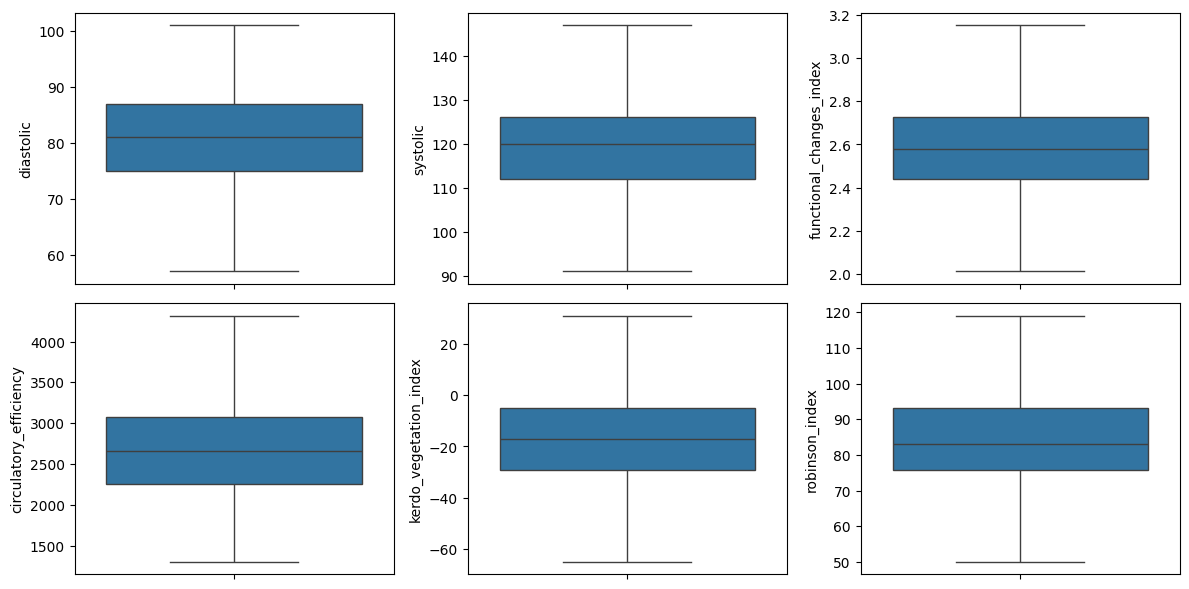

Processing data/heart_rate.csv...
Original shape: (523783, 4), After dropping NaN: (523783, 4)
Number of duplicates found: 0
Outliers handled for data/heart_rate.csv.
Displaying boxplots for data/heart_rate.csv:


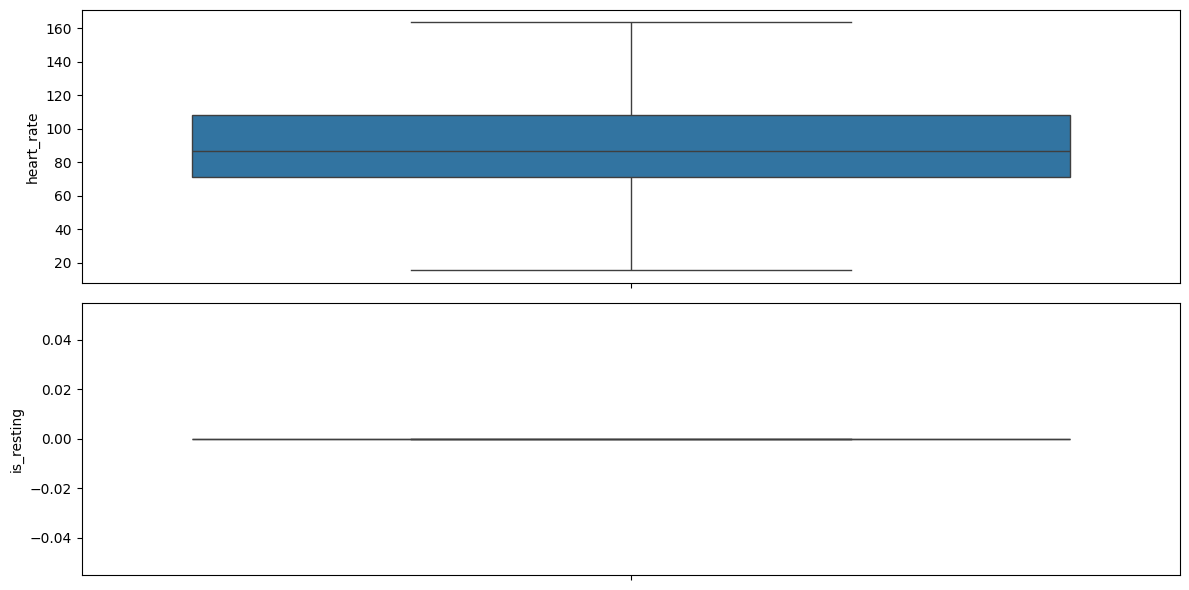

Processing data/hrv_measurements.csv...
Original shape: (3245, 22), After dropping NaN: (924, 22)
Number of duplicates found: 0
Outliers handled for data/hrv_measurements.csv.
Displaying boxplots for data/hrv_measurements.csv:


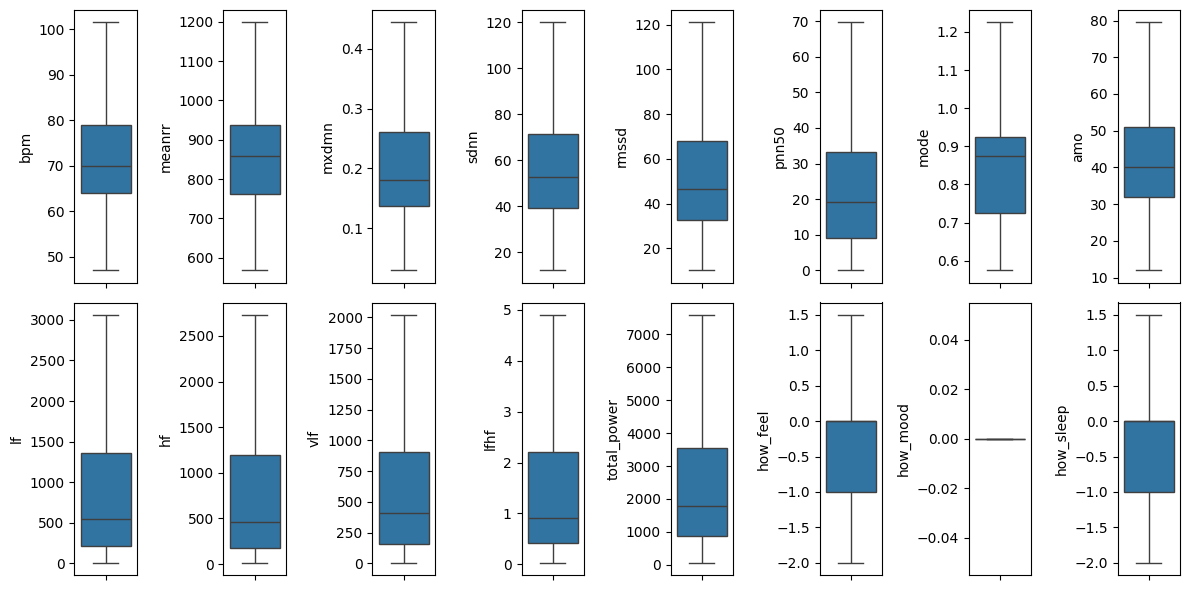

Processing data/participants.csv...
Original shape: (185, 8), After dropping NaN: (136, 8)
Number of duplicates found: 0
Outliers handled for data/participants.csv.
Displaying boxplots for data/participants.csv:


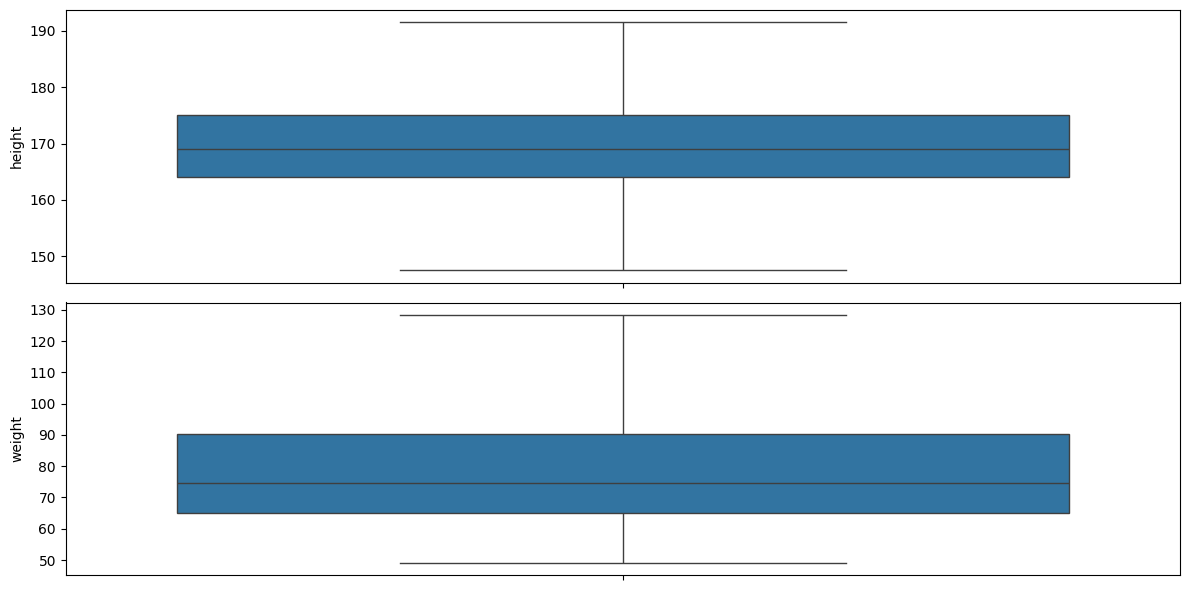

Processing data/sleep.csv...
Original shape: (425, 12), After dropping NaN: (1, 12)
Number of duplicates found: 0
Outliers handled for data/sleep.csv.
Displaying boxplots for data/sleep.csv:


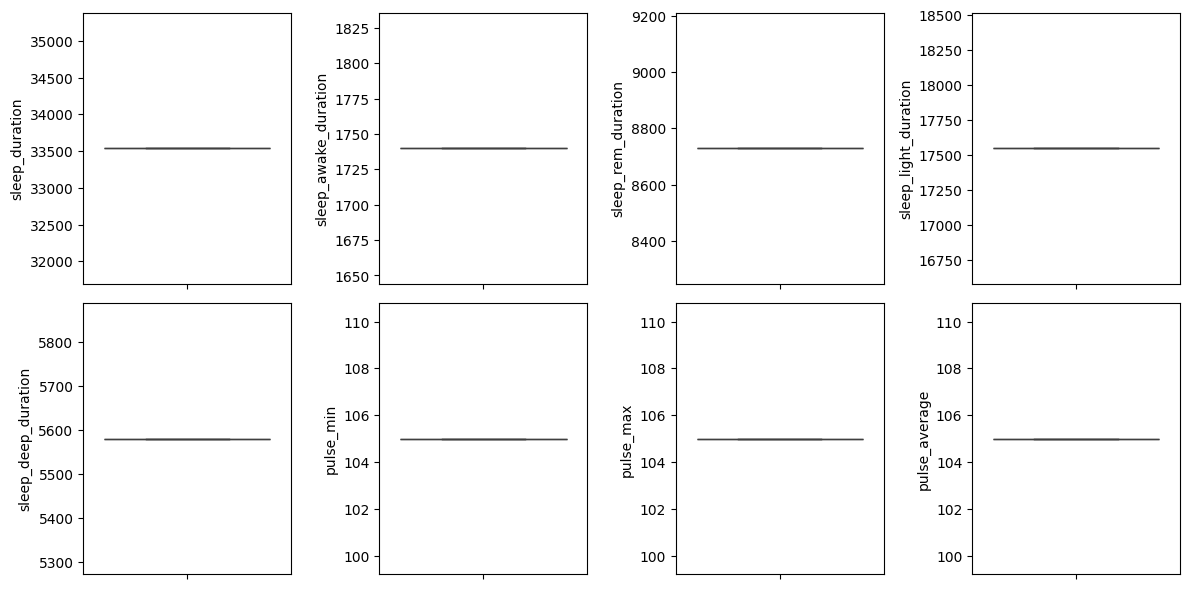

Processing data/surveys.csv...
Original shape: (2259, 5), After dropping NaN: (2259, 5)
Number of duplicates found: 0
Outliers handled for data/surveys.csv.
Displaying boxplots for data/surveys.csv:


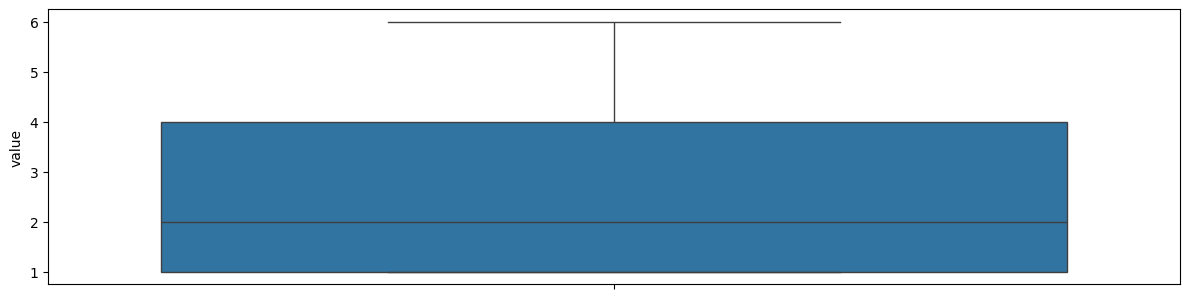

Processing data/wearables.csv...
Original shape: (3098, 18), After dropping NaN: (0, 18)
Number of duplicates found: 0
Outliers handled for data/wearables.csv.
Displaying boxplots for data/wearables.csv:


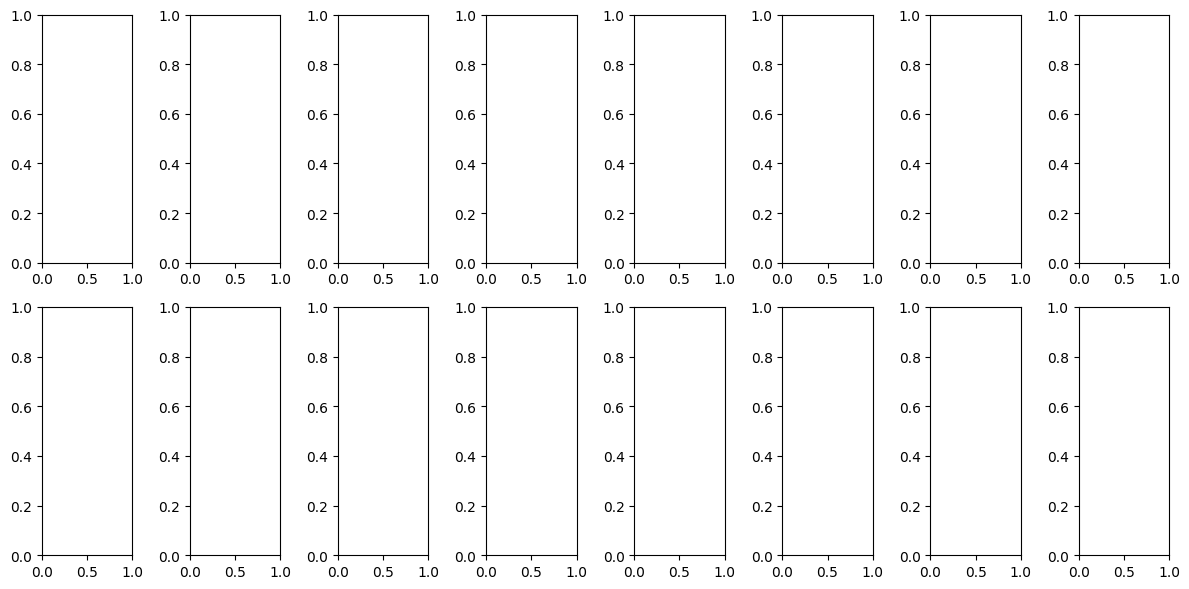

Processing data/weather.csv...
Original shape: (1717, 7), After dropping NaN: (1717, 7)
Number of duplicates found: 0
Outliers handled for data/weather.csv.
Displaying boxplots for data/weather.csv:


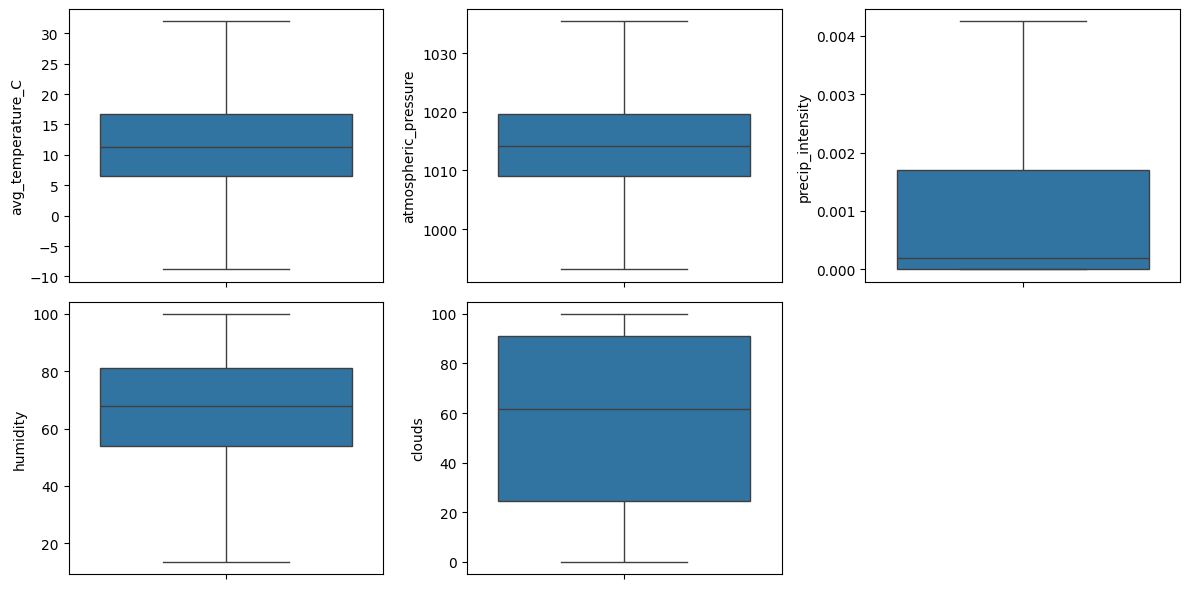

In [7]:
# List of CSV file paths
file_list = ['data/blood_pressure.csv', 'data/heart_rate.csv', 'data/hrv_measurements.csv', 'data/participants.csv']
file_list2 = ['data/sleep.csv', 'data/surveys.csv', 'data/wearables.csv', 'data/weather.csv']
# Function to process each CSV file
def process_files(file_list):
    processed_files = []
    for file_name in file_list:
        print(f"Processing {file_name}...")
        
        # Step 1: Read the file
        df = read_file(file_name)
        
        # Step 2: Drop NaN values
        original_shape, after_shape, df = drop_nan(df)
        print(f"Original shape: {original_shape}, After dropping NaN: {after_shape}")
        
        # Step 3: Remove duplicates
        duplicates_rows, df = duplicates(df)
        print(f"Number of duplicates found: {duplicates_rows.shape[0]}")
        
        # Step 4: Handle outliers
        df = outlier(df)
        print(f"Outliers handled for {file_name}.")
        
        # Step 5: Check outliers by plotting
        print(f"Displaying boxplots for {file_name}:")
        check_outlier(df)
        
        # Append the cleaned DataFrame to the list of processed files
        processed_files.append(df)
        
    return processed_files

# Process all files
processed_files = process_files(file_list)
processed_files2 = process_files(file_list2)


### Readressing Sleep and Wearables

Processing data/sleep.csv...
Number of duplicates found: 0
Outliers handled for data/sleep.csv.
Displaying boxplots for data/sleep.csv:


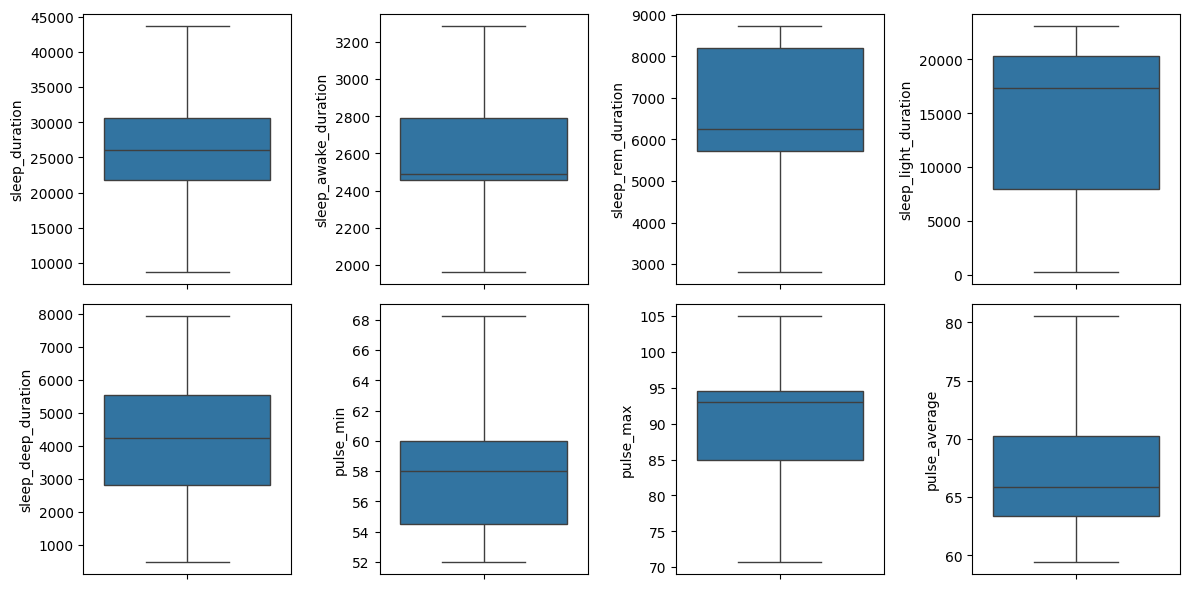

Processing data/wearables.csv...
Number of duplicates found: 0
Outliers handled for data/wearables.csv.
Displaying boxplots for data/wearables.csv:


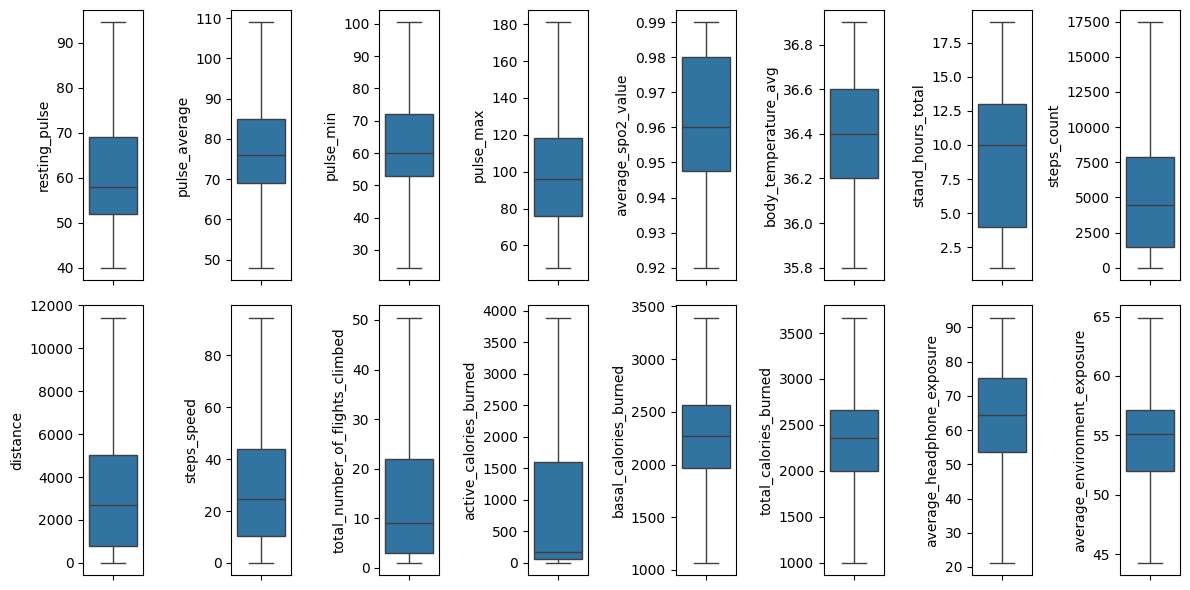

In [8]:
# reprocess without deletions
def process_files2(file_list):
    processed_files = []
    for file_name in file_list:
        print(f"Processing {file_name}...")
        
        # Step 1: Read the file
        df = read_file(file_name)
        
        # Step 2: Remove duplicates
        duplicates_rows, df = duplicates(df)
        print(f"Number of duplicates found: {duplicates_rows.shape[0]}")
        
        # Step 3: Handle outliers
        df = outlier(df)
        print(f"Outliers handled for {file_name}.")
        
        # Step 4: Check outliers by plotting
        print(f"Displaying boxplots for {file_name}:")
        check_outlier(df)
        
        # Append the cleaned DataFrame to the list of processed files
        processed_files.append(df)
        
    return processed_files

adjusted = process_files2(['data/sleep.csv', 'data/wearables.csv'])

In [9]:
sleep = adjusted[0]
wearables = adjusted[1]

#replace nans with mean of columns to preserve sample size
sleep.iloc[:, 5:] = sleep.iloc[:, 5:].apply(lambda col: col.fillna(col.mean()), axis=0)
wearables.iloc[:, 2:] = wearables.iloc[:,2:].apply(lambda col: col.fillna(col.mean()), axis=0)
print(sleep.isna().any())
print(wearables.isna().any())

user_code               False
day                     False
sleep_begin             False
sleep_end               False
sleep_duration          False
sleep_awake_duration    False
sleep_rem_duration      False
sleep_light_duration    False
sleep_deep_duration     False
pulse_min               False
pulse_max               False
pulse_average           False
dtype: bool
user_code                          False
day                                False
resting_pulse                      False
pulse_average                      False
pulse_min                          False
pulse_max                          False
average_spo2_value                 False
body_temperature_avg               False
stand_hours_total                  False
steps_count                        False
distance                           False
steps_speed                        False
total_number_of_flights_climbed    False
active_calories_burned             False
basal_calories_burned              False
total_calorie

## Additional Data Exploration

Data quality was largely addressed with our code for outliers and missing values. For more information on those parameters see code above with the breakdown of data that was clipped and filtered for missing values. Data did not have duplicates

In [10]:
bp = processed_files[0]
hr = processed_files[1]
hrv = processed_files[2]
participants = processed_files[3]
surveys = processed_files2[1]
weather = processed_files2[3]

In [11]:
# analyze data structure
print(bp.shape)
print(bp.info())
# analyze descriptive statistics
print(bp.describe())
# analyze variable relationships
print(bp.select_dtypes(include=[np.number]).corr())

bp.head()

(283, 8)
<class 'pandas.core.frame.DataFrame'>
Index: 283 entries, 2 to 719
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_code                 283 non-null    object 
 1   measurement_datetime      283 non-null    object 
 2   diastolic                 283 non-null    int64  
 3   systolic                  283 non-null    int64  
 4   functional_changes_index  283 non-null    float64
 5   circulatory_efficiency    283 non-null    float64
 6   kerdo_vegetation_index    283 non-null    float64
 7   robinson_index            283 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 19.9+ KB
None
        diastolic    systolic  functional_changes_index  \
count  283.000000  283.000000                283.000000   
mean    80.667845  119.314488                  2.592809   
std      8.322996   10.418718                  0.254019   
min     57.000000   91.000000         

,user_code,measurement_datetime,diastolic,systolic,functional_changes_index,circulatory_efficiency,kerdo_vegetation_index,robinson_index
2,01bad5a519,2020-04-30 09:16:38,95,140,3.1525,4315.5,6.0,119.0225
6,01bad5a519,2020-05-01 11:29:18,80,122,2.7300,3150.0,-7.0,91.5000
8,01bad5a519,2020-05-03 08:28:30,76,112,2.6000,2844.0,4.0,88.4800
10,01bad5a519,2020-05-03 21:25:34,80,120,2.9200,3800.0,16.0,114.0000
12,01bad5a519,2020-05-04 07:07:27,84,126,2.7400,2856.0,-24.0,85.6800


data structure: the blood pressure data is composed of a user code, time object, and parameters relating to blood pressure. See shape printed above as well. <br/>
descriptive statistics: From the stats above, we can see distribution metrics for all columns. Most notably, circulatory efficiency ranges a lot while the others are decently steady. <br/>
variable relationships: Can be seen in the correlation table above, most notably the function changes index is highly correlated with the robinson index. <br/>

In [12]:
# analyze data structure
print(hr.shape)
print(hr.info())
# analyze descriptive statistics
print(hr.describe())
# analyze variable relationships
print(hr[hr['is_resting'] == 1])
hr.head()

(523783, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523783 entries, 0 to 523782
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_code   523783 non-null  object 
 1   datetime    523783 non-null  object 
 2   heart_rate  523783 non-null  float64
 3   is_resting  523783 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 16.0+ MB
None
          heart_rate  is_resting
count  523783.000000    523783.0
mean       90.796504         0.0
std        24.858466         0.0
min        15.500000         0.0
25%        71.000000         0.0
50%        87.000000         0.0
75%       108.000000         0.0
max       163.500000         0.0
Empty DataFrame
Columns: [user_code, datetime, heart_rate, is_resting]
Index: []


,user_code,datetime,heart_rate,is_resting
0,007b8190cf,2020-04-26 04:49:25,70.0,0
1,01bad5a519,2020-04-23 06:21:03,74.0,0
2,01bad5a519,2020-04-23 09:46:01,82.0,0
3,01bad5a519,2020-04-23 14:05:06,90.0,0
4,01bad5a519,2020-04-24 03:41:18,72.0,0


data structure: the heart rate data is composed of a user code, time object, heart rate, and whether the rate is resting or not. See shape printed above as well. <br/>
descriptive statistics: we can see the distribution stats on heart rate above, heart rates look much higher than normal. <br/>
variable relationships: No correlation table is shown because is_resting is always 0, but heart rate is related to whether their heart rate is resting.  <br/>

In [13]:
# analyze data structure
print(hrv.shape)
print(hrv.info())
# analyze descriptive statistics
print(hrv.describe())
# analyze variable relationships
print(hrv.select_dtypes(include=[np.number]).corr())

hrv.head()

(924, 22)
<class 'pandas.core.frame.DataFrame'>
Index: 924 entries, 13 to 3244
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_code             924 non-null    object 
 1   rr_code               924 non-null    object 
 2   measurement_datetime  924 non-null    object 
 3   time_of_day           924 non-null    object 
 4   bpm                   924 non-null    float64
 5   meanrr                924 non-null    float64
 6   mxdmn                 924 non-null    float64
 7   sdnn                  924 non-null    float64
 8   rmssd                 924 non-null    float64
 9   pnn50                 924 non-null    float64
 10  mode                  924 non-null    float64
 11  amo                   924 non-null    float64
 12  lf                    924 non-null    float64
 13  hf                    924 non-null    float64
 14  vlf                   924 non-null    float64
 15  lfhf            

,user_code,rr_code,measurement_datetime,time_of_day,bpm,meanrr,mxdmn,sdnn,rmssd,pnn50,...,lf,hf,vlf,lfhf,total_power,how_feel,how_mood,how_sleep,tags,rr_data
13,01bad5a519,0a58316238,2020-04-22 09:13:10,morning,69.0,867.22,0.11,31.382,21.894,4.04,...,75.0,87.0,273.0,0.862,435.0,0.0,0,0.0,After; COVID-19,"850,838,830,833,820,849,828,845,841,798,841,84..."
26,01bad5a519,5e7051b919,2020-04-26 08:26:03,morning,94.0,636.67,0.11,24.956,18.245,3.03,...,117.0,100.0,38.0,1.170,255.0,0.0,0,0.0,After; Workout,"559,569,616,562,614,640,627,632,624,639,657,62..."
34,01bad5a519,9bfcd42fbc,2020-04-28 09:21:12,morning,72.0,832.69,0.06,16.141,11.970,0.00,...,54.0,31.0,56.0,1.742,141.0,0.0,0,0.0,After; Workout,"795,795,822,827,828,820,813,833,796,813,803,81..."
37,01bad5a519,88d3a2c2f6,2020-04-29 07:01:19,morning,83.0,722.97,0.10,24.944,26.729,8.08,...,218.0,104.0,20.0,2.096,342.0,0.0,0,0.0,Morning,"665,646,689,678,667,685,687,688,735,698,792,73..."
38,01bad5a519,a34ad8d1e1,2020-04-29 11:56:11,morning,94.0,634.18,0.07,20.384,22.030,3.03,...,21.0,68.0,52.0,0.309,141.0,0.0,0,0.0,After; Hydrotherapy,"591,590,662,528,600,641,673,677,663,652,678,64..."


data structure: the hrv data is composed of a user code, time object, and many parameters relating to heart rate variance. See shape printed above as well. <br/>
descriptive statistics: From the stats above, we can see distribution metrics for all columns. Nothing stands out in particular given this is niche health data. <br/>
variable relationships: Can be seen in the correlation table above, there are many parameters highly related and many that are not. <br/>

In [14]:
# analyze data structure
print(participants.shape)
print(participants.info())
# analyze descriptive statistics
print(participants.describe())
# analyze variable relationships
print(participants.select_dtypes(include=[np.number]).corr())

participants.head()

(136, 8)
<class 'pandas.core.frame.DataFrame'>
Index: 136 entries, 1 to 184
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_code       136 non-null    object 
 1   gender          136 non-null    object 
 2   age_range       136 non-null    object 
 3   city            136 non-null    object 
 4   country         136 non-null    object 
 5   height          136 non-null    float64
 6   weight          136 non-null    float64
 7   symptoms_onset  136 non-null    object 
dtypes: float64(2), object(6)
memory usage: 9.6+ KB
None
          height      weight
count  136.00000  136.000000
mean   169.74250   78.205306
std      8.66582   18.454623
min    147.50000   49.124000
25%    164.00000   65.000000
50%    169.00000   74.593500
75%    175.00000   90.366750
max    191.50000  128.416875
          height    weight
height  1.000000  0.288169
weight  0.288169  1.000000


,user_code,gender,age_range,city,country,height,weight,symptoms_onset
1,013f6d3e5b,f,18-24,São Paulo,Brazil,174.0,77.3,5/15/2020
2,01bad5a519,m,45-54,St Petersburg,Russia,178.0,92.0,4/5/2020
3,0210b20eea,f,25-34,Sochi,Russia,169.0,60.0,5/6/2020
4,024719e7da,f,45-54,St Petersburg,Russia,158.0,68.5,5/27/2020
9,0bdfbddb2b,f,18-24,Teren'ga,Russia,159.0,73.5,4/1/2020


data structure: the participants data is composed of a user code and characteristics of said user. See shape printed above as well. <br/>
descriptive statistics: From the stats above, we can see distribution metrics for all columns. Nothing stands out as the only numerical columns are height and weight. <br/>
variable relationships: Can be seen in the correlation table above, height and weight have low correlation which may be out of the ordinary. <br/>

In [15]:
# analyze data structure
print(sleep.shape)
print(sleep.info())
# analyze descriptive statistics
print(sleep.describe())
# analyze variable relationships
print(sleep.select_dtypes(include=[np.number]).corr())

sleep.head()

(425, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_code             425 non-null    object 
 1   day                   425 non-null    object 
 2   sleep_begin           425 non-null    object 
 3   sleep_end             425 non-null    object 
 4   sleep_duration        425 non-null    float64
 5   sleep_awake_duration  425 non-null    float64
 6   sleep_rem_duration    425 non-null    float64
 7   sleep_light_duration  425 non-null    float64
 8   sleep_deep_duration   425 non-null    float64
 9   pulse_min             425 non-null    float64
 10  pulse_max             425 non-null    float64
 11  pulse_average         425 non-null    float64
dtypes: float64(8), object(4)
memory usage: 40.0+ KB
None
       sleep_duration  sleep_awake_duration  sleep_rem_duration  \
count      425.000000            425.000000   

,user_code,day,sleep_begin,sleep_end,sleep_duration,sleep_awake_duration,sleep_rem_duration,sleep_light_duration,sleep_deep_duration,pulse_min,pulse_max,pulse_average
0,0d297d2410,2019-12-31,2019-12-31 07:50:32,2019-12-31 08:45:22,8742.5,2656.666667,6518.571429,14514.740741,4280.285714,58.083333,90.45,67.249767
1,0d297d2410,2020-01-01,2020-01-01 04:13:41,2020-01-01 09:45:02,19881.0,2656.666667,6518.571429,14514.740741,4280.285714,58.083333,90.45,67.249767
2,0d297d2410,2020-01-02,2020-01-02 02:14:52,2020-01-02 08:06:00,21068.0,2656.666667,6518.571429,14514.740741,4280.285714,58.083333,90.45,67.249767
3,0d297d2410,2020-01-03,2020-01-03 00:10:00,2020-01-03 08:45:10,30910.0,2656.666667,6518.571429,14514.740741,4280.285714,58.083333,90.45,67.249767
4,0d297d2410,2020-01-04,2020-01-04 01:27:25,2020-01-04 08:52:20,26695.0,2656.666667,6518.571429,21480.000000,4280.285714,55.000000,95.00,72.500000


data structure: the sleep data is composed of a user code, sleep start and end, and parameters relating to other sleep characteristics. See shape printed above as well. <br/>
descriptive statistics: From the stats above, we can see distribution metrics. Some metrics may be somewhat inaccurate due to high amounts of missing data. <br/>
variable relationships: Can be seen in the correlation table above, all are fairly independent. <br/>

In [16]:
# analyze data structure
print(weather.shape)
print(weather.info())
# analyze descriptive statistics
print(weather.describe())
# analyze variable relationships
print(weather.select_dtypes(include=[np.number]).corr())

weather.head()

(1717, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1717 entries, 0 to 1716
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_code             1717 non-null   object 
 1   day                   1717 non-null   object 
 2   avg_temperature_C     1717 non-null   float64
 3   atmospheric_pressure  1717 non-null   float64
 4   precip_intensity      1717 non-null   float64
 5   humidity              1717 non-null   float64
 6   clouds                1717 non-null   float64
dtypes: float64(5), object(2)
memory usage: 94.0+ KB
None
       avg_temperature_C  atmospheric_pressure  precip_intensity     humidity  \
count        1717.000000           1717.000000       1717.000000  1717.000000   
mean           11.802527           1014.118461          0.001102    66.438717   
std             7.628319              8.215845          0.001574    19.157509   
min            -8.815350            993.149

,user_code,day,avg_temperature_C,atmospheric_pressure,precip_intensity,humidity,clouds
0,013f6d3e5b,2020-05-22,18.0667,1017.6,0.0002,70.0,67.0
1,01bad5a519,2020-01-11,-1.2111,1016.4,0.0002,92.0,6.0
2,01bad5a519,2020-01-30,0.5056,1004.7,0.0009,85.0,100.0
3,01bad5a519,2020-04-02,-0.2444,994.4,0.0025,91.0,87.0
4,01bad5a519,2020-04-12,5.1778,1016.1,0.0000,61.0,91.0


data structure: the weather data is composed of a user code, time object, and parameters relating to weather of the day. See shape printed above as well. <br/>
descriptive statistics: From the stats above, we can see distribution metrics for all columns. Precipitation is fairly uncommon and that is not surprising. <br/>
variable relationships: Can be seen in the correlation table above, variables are decently independent. <br/>

In [17]:
# analyze data structure
print(wearables.shape)
print(wearables.info())
# analyze descriptive statistics
print(wearables.describe())
# analyze variable relationships
print(wearables.select_dtypes(include=[np.number]).corr())

wearables.head()

(3098, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3098 entries, 0 to 3097
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   user_code                        3098 non-null   object 
 1   day                              3098 non-null   object 
 2   resting_pulse                    3098 non-null   float64
 3   pulse_average                    3098 non-null   float64
 4   pulse_min                        3098 non-null   float64
 5   pulse_max                        3098 non-null   float64
 6   average_spo2_value               3098 non-null   float64
 7   body_temperature_avg             3098 non-null   float64
 8   stand_hours_total                3098 non-null   float64
 9   steps_count                      3098 non-null   float64
 10  distance                         3098 non-null   float64
 11  steps_speed                      3098 non-null   float64
 12  total_num

,user_code,day,resting_pulse,pulse_average,pulse_min,pulse_max,average_spo2_value,body_temperature_avg,stand_hours_total,steps_count,distance,steps_speed,total_number_of_flights_climbed,active_calories_burned,basal_calories_burned,total_calories_burned,average_headphone_exposure,average_environment_exposure
0,007b8190cf,2020-04-26,61.319142,70.000000,70.000000,70.000000,0.961,36.404615,8.986817,5256.889482,3352.928839,28.678001,14.322672,748.590417,2859.0,2859.0,64.068853,54.660604
1,01bad5a519,2020-02-12,61.319142,77.761608,62.997846,99.336046,0.961,36.404615,8.986817,8574.000000,3352.928839,57.900000,14.322672,748.590417,2624.0,2624.0,64.068853,54.660604
2,01bad5a519,2020-02-13,61.319142,77.761608,62.997846,99.336046,0.961,36.404615,8.986817,7462.000000,3352.928839,59.100000,14.322672,748.590417,2624.0,2624.0,64.068853,54.660604
3,01bad5a519,2020-02-15,61.319142,77.761608,62.997846,99.336046,0.961,36.404615,8.986817,2507.000000,3352.928839,60.970000,14.322672,748.590417,2624.0,2624.0,64.068853,54.660604
4,01bad5a519,2020-02-16,61.319142,77.761608,62.997846,99.336046,0.961,36.404615,8.986817,10131.000000,3352.928839,49.100000,14.322672,748.590417,2624.0,2624.0,64.068853,54.660604


data structure: the wearables data is composed of a user code, time object, and parameters relating to metrics recorded on the wearable. See shape printed above as well. <br/>
descriptive statistics: From the stats above, we can see distribution metrics for all columns. <br/>
variable relationships: Can be seen in the correlation table above, due to the high dimension, many variables are correlated and uncorrelated with each other. <br/>

In [18]:
# analyze data structure
print(surveys.shape)
print(surveys.info())
# analyze descriptive statistics
print(surveys.describe())
# analyze variable relationships
print(surveys.select_dtypes(include=[np.number]).corr())

surveys.head()

(2259, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2259 entries, 0 to 2258
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_code   2259 non-null   object
 1   scale       2259 non-null   object
 2   created_at  2259 non-null   object
 3   value       2259 non-null   int64 
 4   text        2259 non-null   object
dtypes: int64(1), object(4)
memory usage: 88.4+ KB
None
             value
count  2259.000000
mean      2.364763
std       1.554934
min       1.000000
25%       1.000000
50%       2.000000
75%       4.000000
max       6.000000
       value
value    1.0


,user_code,scale,created_at,value,text
0,01bad5a519,S_CORONA,2020-04-23,2,Symptoms are characteristic of coronavirus
1,01bad5a519,S_COVID_BLUISH,2020-04-23,1,User isn’t experiencing symptom
2,01bad5a519,S_COVID_BLUISH,2020-04-25,1,User isn’t experiencing symptom
3,01bad5a519,S_COVID_BLUISH,2020-04-27,1,User isn’t experiencing symptom
4,01bad5a519,S_COVID_BLUISH,2020-04-29,1,User isn’t experiencing symptom


data structure: the survey data is composed of a user code, time, and parameters relating to the survey like scale and value. See shape printed above as well. <br/>
descriptive statistics: From the stats above, we can see distribution metrics for value. This is somewhat irrelevant as the value meanings change by the scale.  <br/>
variable relationships: The value listed can be related to the scales_description table. This table is shown below and provides context for the meaning of survey answers. <br/>

In [19]:
scale_descrip = pd.read_csv('data/scales_description.csv')
scale_descrip.head()

,Scale,Description,Value,Meaning
0,S_COVID_SYMPTOMS,How long the user has been experiencing symptoms,1,Less than 3 days
1,S_COVID_SYMPTOMS,How long the user has been experiencing symptoms,2,3 to 6 days
2,S_COVID_SYMPTOMS,How long the user has been experiencing symptoms,3,7 to 14 days
3,S_COVID_SYMPTOMS,How long the user has been experiencing symptoms,4,More than 14 days
4,S_COVID_COUGH,Symptom intensity: Coughing,1,User isn’t experiencing symptom


## Create new feature

In [20]:
#create a new feature "BMI" in participants.csv
processed_files[3]['BMI']=processed_files[3]['weight']/(processed_files[3]['height']/100)**2
processed_files[3]

,user_code,gender,age_range,city,country,height,weight,symptoms_onset,BMI
1,013f6d3e5b,f,18-24,São Paulo,Brazil,174.00,77.300000,5/15/2020,25.531774
2,01bad5a519,m,45-54,St Petersburg,Russia,178.00,92.000000,4/5/2020,29.036738
3,0210b20eea,f,25-34,Sochi,Russia,169.00,60.000000,5/6/2020,21.007668
4,024719e7da,f,45-54,St Petersburg,Russia,158.00,68.500000,5/27/2020,27.439513
9,0bdfbddb2b,f,18-24,Teren'ga,Russia,159.00,73.500000,4/1/2020,29.073217
...,...,...,...,...,...,...,...,...,...
178,f9edcb7056,f,65-74,Folsom,United States,154.94,128.416875,3/16/2020,53.492758
179,fcf3ea75b0,f,45-54,Moscow,Russia,168.00,92.644000,5/1/2020,32.824546
180,fd387f6269,f,35-44,Attleboro,United States,165.00,115.439000,5/1/2020,42.401837
182,fde84801d8,f,45-54,Tambov,Russia,168.00,79.500000,4/16/2020,28.167517


## Group data by unique user_code and merge

In [21]:
def process_dataframes(processed_files):
    # List to store processed DataFrames
    processed_dfs = []  

    for df in processed_files:
        # Step 1: Drop categorical columns
        numeric_df = df.select_dtypes(include=['int64', 'float64'])
        
        # Step 2: Group by 'user_code' and calculate the mean for numerical columns
        unique_df = numeric_df.groupby(df['user_code']).mean().reset_index()
        
        # Append the processed DataFrame to the list
        processed_dfs.append(unique_df)

    return processed_dfs

In [22]:
processed_files=process_dataframes(processed_files)

In [23]:
# Merge all processed DataFrames on 'user_code'
def merge_dataframes(processed_files):

    # Start with the first processed DataFrame
    final_merged_df = processed_files[0]  
    # Merge the rest
    for processed_file in processed_files[1:]:  
        final_merged_df = final_merged_df.merge(processed_file, on='user_code', how='inner')

    return final_merged_df

In [24]:
# Example usage:
final_result = merge_dataframes(processed_files)

# Display the shape of the final merged DataFrame
print(f"Final Merged DataFrame: Shape = {final_result.shape}")

Final Merged DataFrame: Shape = (12, 28)


In [25]:
#Display rows of the final merged DataFrame
final_result

,user_code,diastolic,systolic,functional_changes_index,circulatory_efficiency,kerdo_vegetation_index,robinson_index,heart_rate,is_resting,bpm,...,hf,vlf,lfhf,total_power,how_feel,how_mood,how_sleep,height,weight,BMI
0,01bad5a519,85.500000,125.500000,2.890625,3361.750000,-1.875000,102.566875,77.360000,0.0,85.500000,...,71.000000,74.166667,1.599333,246.500000,0.000000,0.0,0.000000,178.00,92.000000,29.036738
1,1b9321b648,78.333333,111.666667,2.530000,2750.000000,5.666667,94.400000,83.285714,0.0,79.400000,...,1570.400000,438.200000,0.835600,2969.200000,0.100000,0.0,-0.700000,154.00,67.000000,28.250970
2,1ed25f66e9,64.000000,97.000000,2.012500,2178.000000,3.000000,64.020000,69.200000,0.0,58.000000,...,599.000000,888.000000,3.960000,3859.000000,0.000000,0.0,1.000000,176.00,82.500000,26.633523
3,295ed96279,67.500000,102.750000,2.021250,1890.000000,-25.250000,55.470625,56.379699,0.0,62.937500,...,1192.312500,643.812500,1.224187,2916.937500,-0.062500,0.0,-0.125000,166.00,55.000000,19.959355
4,6be5033971,74.734375,120.765625,2.445937,2828.203125,-22.828125,74.172969,75.341774,0.0,60.244444,...,544.122222,950.933333,2.325892,2723.100000,-0.666667,0.0,-0.488889,164.00,58.500000,21.750446
5,6ecfe4a351,73.666667,110.333333,2.091667,2434.000000,-11.666667,73.543333,150.666982,0.0,78.000000,...,2037.000000,222.000000,0.524000,3326.000000,-2.000000,0.0,-1.000000,167.00,63.000000,22.589551
6,7d2c87fb7e,80.000000,120.000000,2.670000,2720.000000,-18.000000,81.600000,68.000000,0.0,73.000000,...,315.666667,543.333333,2.925042,1600.333333,-0.333333,0.0,-1.666667,183.00,91.500000,27.322404
7,8633d50fa7,98.000000,144.000000,3.152500,3404.000000,-32.000000,106.560000,70.500000,0.0,65.500000,...,342.500000,102.000000,0.767000,681.500000,-0.500000,0.0,0.000000,175.00,92.941000,30.348082
8,9871ee5e7b,82.000000,147.000000,3.152500,4315.500000,22.000000,119.022500,86.709677,0.0,80.090909,...,703.136364,303.545455,1.426545,1918.818182,-0.909091,0.0,-0.818182,178.00,72.660000,22.932711
9,cf7e50bcde,65.166667,99.250000,2.248750,3053.458333,23.916667,88.857500,86.600000,0.0,83.000000,...,1230.500000,134.500000,0.520500,1969.500000,0.500000,0.0,-0.500000,165.00,55.111000,20.242792


In [26]:
final_result.describe()

,diastolic,systolic,functional_changes_index,circulatory_efficiency,kerdo_vegetation_index,robinson_index,heart_rate,is_resting,bpm,meanrr,...,hf,vlf,lfhf,total_power,how_feel,how_mood,how_sleep,height,weight,BMI
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.0,12.000000,12.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,12.0,12.000000,12.000000,12.000000,12.000000
mean,77.301939,116.907938,2.593556,2848.748794,-4.771557,86.644287,81.405593,0.0,73.413174,836.998714,...,966.856717,480.941258,1.459121,2547.642041,-0.358029,0.0,-0.387434,169.078333,78.177406,27.560571
std,9.686394,15.900886,0.438905,643.499912,18.346571,18.140249,23.426874,0.0,9.336344,111.373612,...,810.793510,364.901838,1.091398,1945.917665,0.641158,0.0,0.653832,9.148323,21.262727,8.920879
min,64.000000,97.000000,2.012500,1890.000000,-32.000000,55.470625,56.379699,0.0,58.000000,714.685000,...,71.000000,74.166667,0.478880,246.500000,-2.000000,0.0,-1.666667,154.000000,55.000000,19.959355
25%,72.125000,107.437500,2.209479,2419.935185,-19.207031,74.015560,70.175000,0.0,64.859375,761.476182,...,335.791667,200.125000,0.706250,1393.047619,-0.541667,0.0,-0.729545,164.750000,61.875000,22.379775
50%,76.533854,113.648148,2.600000,2789.101562,-6.381944,89.052569,76.350887,0.0,77.642619,786.516863,...,651.068182,370.872727,1.073332,2346.300000,-0.197917,0.0,-0.339683,167.500000,76.080000,26.977964
75%,82.680556,121.949219,2.956094,3130.531250,6.916667,96.441719,84.114286,0.0,79.572727,929.715937,...,1315.475000,704.859375,1.780973,3058.400000,0.000000,0.0,-0.093750,176.500000,91.625000,28.447412
max,98.000000,147.000000,3.152500,4315.500000,23.916667,119.022500,150.666982,0.0,85.500000,1029.040000,...,2730.500000,1176.280000,3.960000,7589.625000,0.500000,0.0,1.000000,183.000000,128.416875,53.492758


## Data Visualization

-Boxplots are used to check if there are still any outlier. 4 pictures represent 4 csv files and each box plot represents a column.
<br/>-Histograms are used to show the distribution of each column, but because there are total of 27 columns and I think they’re too much so I just randomly pick 9.
<br/>-Heatmap is used to show correlation between each column, for example there’s a strong positive correlation between sdnn and mxdmn.

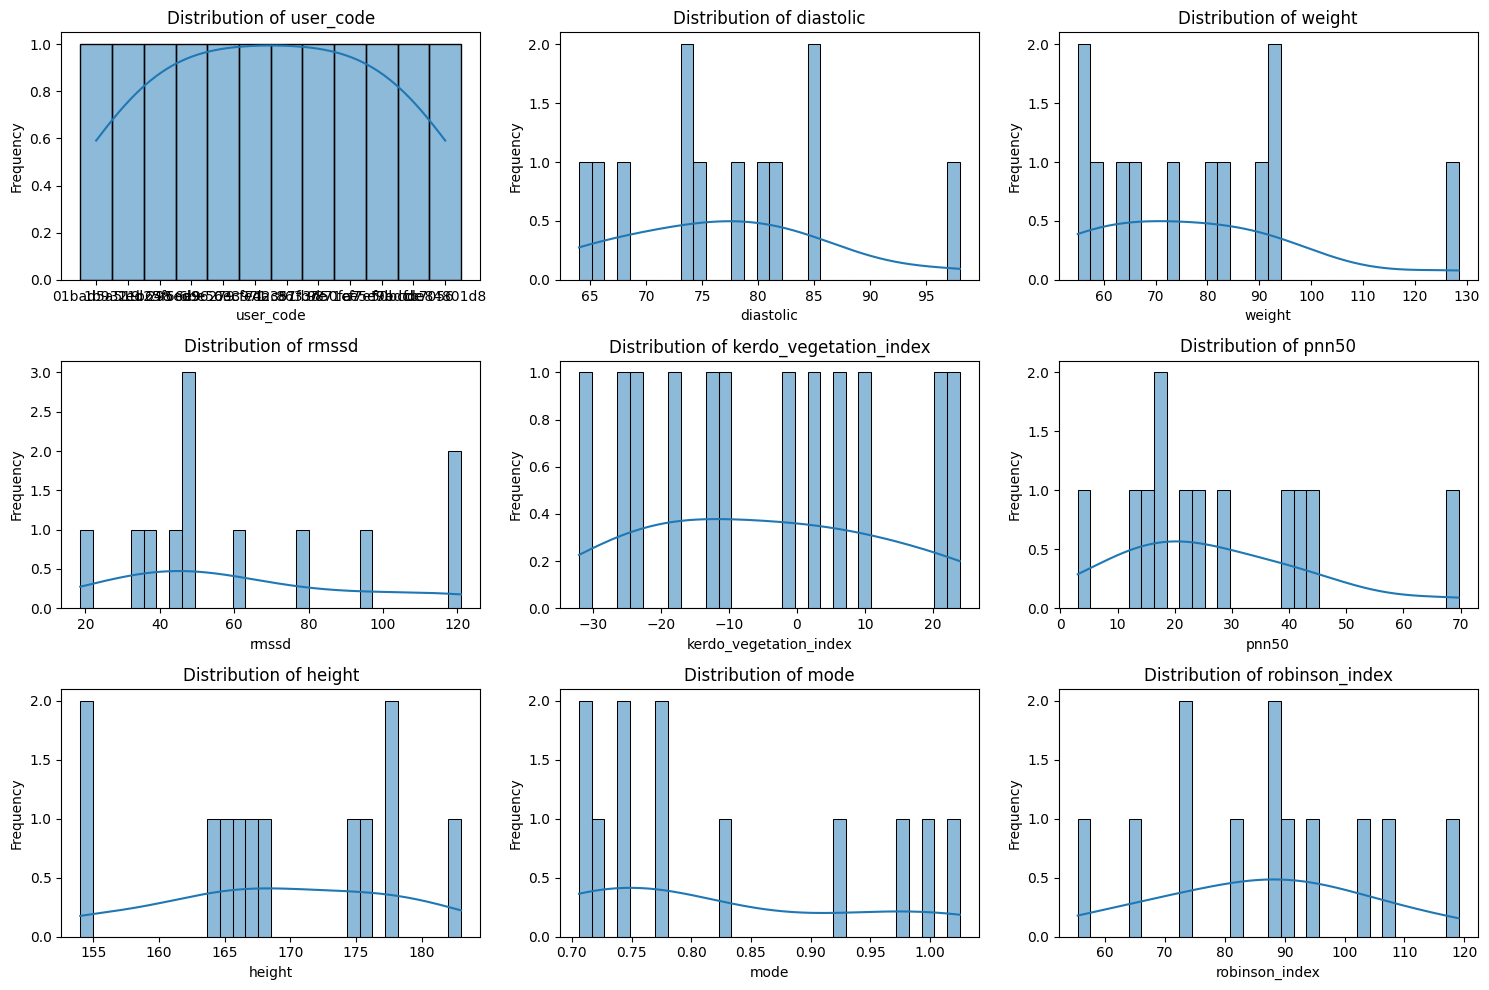

In [27]:
# Randomly select 9 columns
random_columns = random.sample(list(final_result.columns), 9)

# Set up the figure for subplots
plt.figure(figsize=(15, 10))

# Loop through the selected columns and create histograms
for i, column in enumerate(random_columns):
    plt.subplot(3, 3, i + 1)  # 3 rows, 3 columns
    sns.histplot(final_result[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

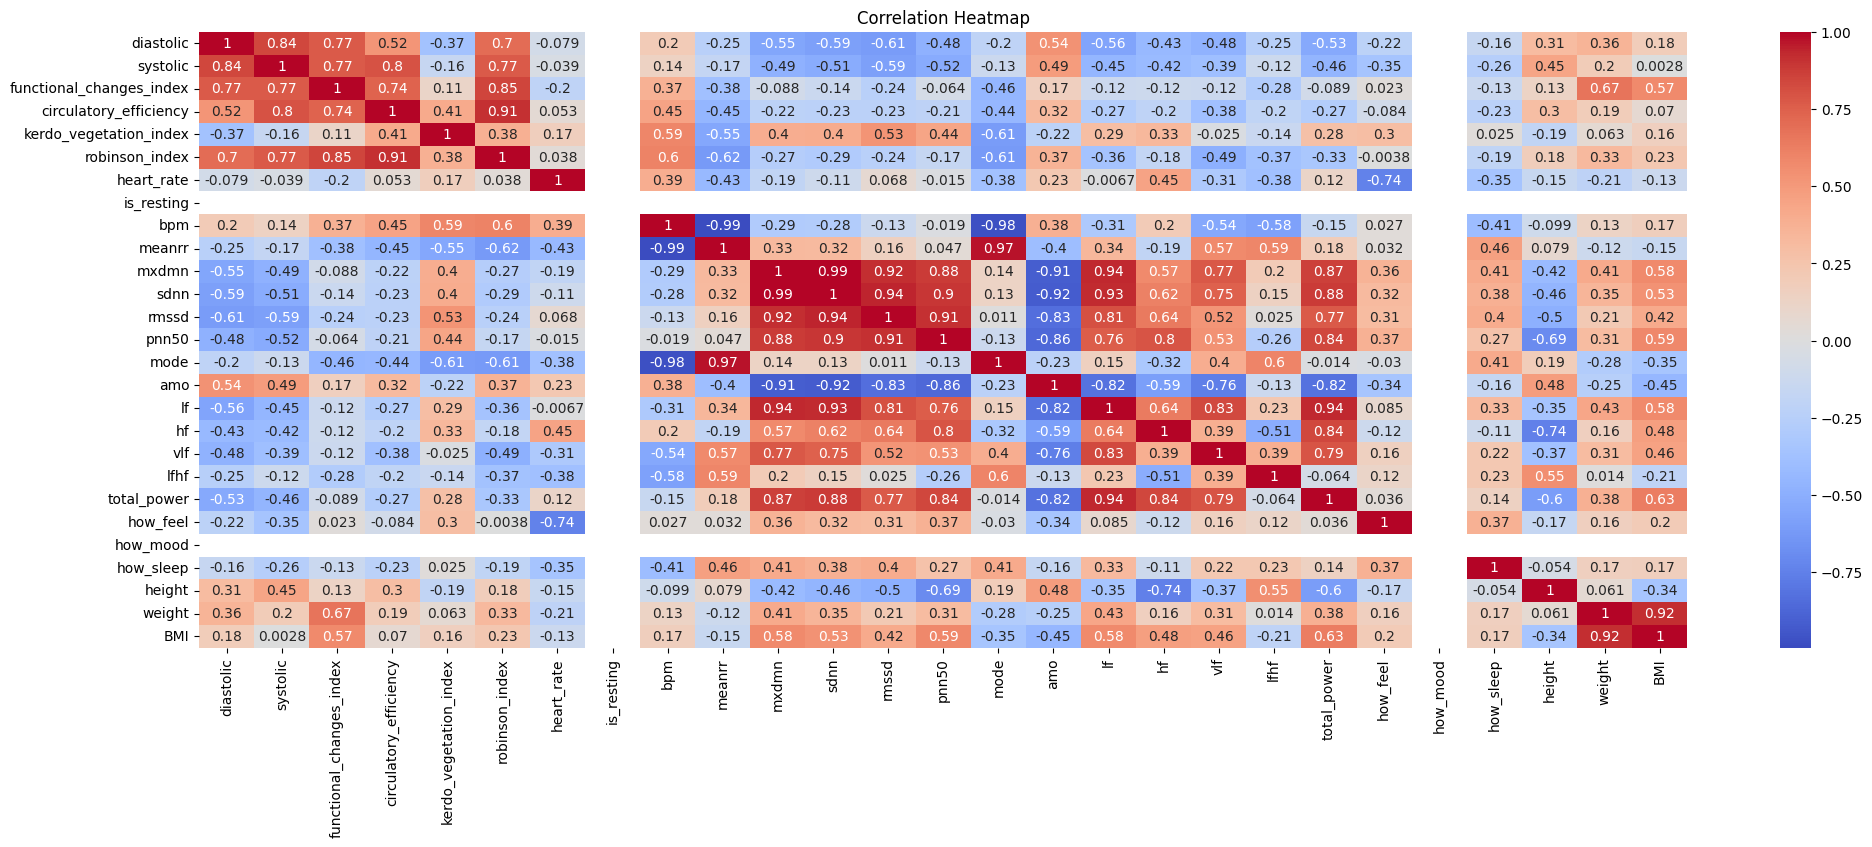

In [28]:
# heatmap of correlations 
final_result_numerical = final_result.drop('user_code', axis=1)
plt.figure(figsize=(24, 8))
sns.heatmap(final_result_numerical.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Dimensionality Reduction and Transformation

A dimensionality reduction would make the most sense when we have too many features. A good use for this would be with the hrv_measurements.csv data. Many of these metrics may be correlated. This will be reduced using PCA with 4 components, as I found that was a good simplifier while retaining 85% variance of data. Data is also transformed with standard scaler before this is done.

In [29]:
# adjusting heart rate variance data for pca
hrv = processed_files[2]
hrv = hrv.iloc[:,4:-2]
hrv.head()

,sdnn,rmssd,pnn50,mode,amo,lf,hf,vlf,lfhf,total_power,how_feel
0,22.090667,18.626333,3.030,0.708333,68.5,101.333333,71.0,74.166667,1.599333,246.5,0.0
1,53.718500,48.028500,10.605,0.900000,40.5,1125.500000,380.5,573.000000,2.897562,2079.0,-0.5
2,61.113000,79.733000,23.230,0.775000,41.0,1289.000000,2730.5,1056.000000,0.469000,5095.0,0.0
3,63.932000,57.391000,19.190,0.675000,62.0,1074.000000,570.0,521.000000,1.884000,2165.0,0.0
4,72.674000,76.471000,28.280,0.875000,43.0,1700.000000,1905.0,521.000000,0.892000,4126.0,-1.0


In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#apply scaler before pca
scaler = StandardScaler()
data_scaled = scaler.fit_transform(hrv)

# pca construction
pca = PCA(n_components=4)  
reduced_data = pca.fit_transform(data_scaled)
pca_df = pd.DataFrame(data=reduced_data, columns=[f'PC{i+1}' for i in range(reduced_data.shape[1])])

# Explained variance ratio
print(pca.explained_variance_ratio_)

pca_df.head()

[0.53866988 0.15210766 0.1018747  0.07593497]


,PC1,PC2,PC3,PC4
0,-3.812696,-0.020244,0.556305,-0.438430
1,-0.374709,1.519309,-0.516398,0.387973
2,2.463742,-1.038106,1.249135,-0.763505
3,-0.707591,0.226413,1.026527,-1.194759
4,2.070463,-0.519900,-0.914827,-1.010018


## Data Quality

The data overall, while messy, seemed to have lots of merrit. The profiling was clear, with context provided in the repository as well as understanding able to be obtained through this exploration. Some files were not as complete as others. Notable the sleep data seemed to be missing many columns but other files held up very well. More information on this can be found in the preprocessing section. The accuracy of this data is sound. The methods used were largely machine based or highly factual. Only one dataset included survey data. It is not quite known how the positive case individuals were selected, so there could be some bias there. The data was consistent across. Table joining was possible with consistent user ids across all tables. The data is open source and not changeable. This preserved the integrite and allows use for research for anyone. The data lineage is small, as this data was pulled from the group sourcing it. With more research down the line the lineage could be longer.